In [157]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob

In [158]:
results_path = '../Metrics/results/'

In [159]:
csv_paths = sorted(glob(results_path + '*'))

In [160]:
def get_method(name):
    s = name
    s = s.split('/')[1]
    s = s.split('-', 1)[1]

    if s.startswith('tsne'):
        return s[:7]
    elif s.startswith('dtsne'):
        return 'dtsne'
    elif s.startswith('pca'):
        return s[:6]
    else:
        return s.split('_')[0]

In [161]:
df_metrics = pd.DataFrame()
for p in csv_paths:
    df = pd.read_csv(p)
    df = df.drop(['spat_kl', 'stab_kl'], axis=1)  # Bad metric
    # Extract dataset and method into own column
    df.columns = np.concatenate([['name'], df.columns.values[1:]])
    df['dataset'] = df['name'].str.split('_', 1).str[0].str.extract(r'.*/(.*)-.*')
    df['method'] = df['name'].apply(get_method)
    df = df.set_index('name')
    
    # Average nh and np metrics 
    cols = [c for c in df.columns if 'spat_nh_' in c]
    df['spat_nh_mean'] = np.mean(df[cols], axis=1)
    
    cols = [c for c in df.columns if 'spat_np_' in c]
    df['spat_np_mean'] = np.mean(df[cols], axis=1)
    
    cols = [c for c in df.columns if 'spat_trust_' in c]
    df['spat_trust_mean'] = np.mean(df[cols], axis=1)
    
    cols = [c for c in df.columns if 'spat_cont_' in c]
    df['spat_cont_mean'] = np.mean(df[cols], axis=1)
    
    df_metrics = pd.concat([df_metrics, df])

In [162]:
methods = ['AE', 'VAE', 'tsne_s1', 'tsne_s4', 'dtsne', 'pca_s1', 'pca_s4']
metrics = ['spat_pearson', 'spat_spearman' , 'spat_kendall', 'spat_stress_s', 'spat_nh_mean', 'spat_np_mean', 'spat_trust_mean', 'spat_cont_mean', 'stab_pearson', 'stab_spearman' , 'stab_kendall', 'stab_stress_s']
invert_colormap = ['stab_stress_n', 'stab_stress_s', 'spat_stress_n', 'spat_stress_s']

In [163]:
meta = df_metrics[['dataset', 'method']]
df_metrics = df_metrics[metrics]

In [164]:
df_metrics = (df_metrics - df_metrics.min()) / (df_metrics.max() - df_metrics.min())
df_metrics['spat_stress_s'] = 1 - df_metrics['spat_stress_s']
df_metrics['stab_stress_s'] = 1 - df_metrics['stab_stress_s']

In [165]:
df_metrics = pd.merge(meta, df_metrics, left_index=True, right_index=True)
df_metrics = df_metrics[df_metrics['method'].isin(methods)]


In [199]:
stab_cols = ['stab_pearson', 'stab_spearman' , 'stab_kendall', 'stab_stress_s']
spat_cols = ['spat_pearson', 'spat_spearman' , 'spat_kendall', 'spat_stress_s', 
             'spat_nh_mean', 'spat_np_mean', 'spat_trust_mean', 'spat_cont_mean']


In [200]:
legs = pd.DataFrame(np.array([df_metrics[stab_cols].mean(axis=1), df_metrics[spat_cols].mean(axis=1)]).T, index=df_metrics['method'])
legs

,0,1
method,,
AE,0.926597,0.766002
VAE,0.960955,0.830400
tsne_s1,0.360409,0.740798
tsne_s4,0.760528,0.610486
dtsne,0.347679,0.726960
pca_s1,0.749340,0.769518
pca_s4,0.934731,0.767418
AE,0.757089,0.716327
VAE,0.884249,0.825486


In [201]:
centers = legs.groupby('method').mean()
centers

,0,1
method,,
AE,0.710549,0.728174
VAE,0.735752,0.728747
dtsne,0.439125,0.588001
pca_s1,0.571453,0.733562
pca_s4,0.744493,0.724391
tsne_s1,0.322474,0.634367
tsne_s4,0.589914,0.617272


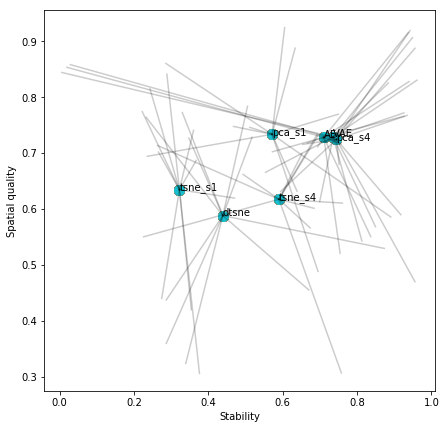

In [240]:
colors = {'AE':'#7fc97f', 'VAE':'#beaed4', 
          'tsne_s1':'#fdc086', 'tsne_s4':'#ffff99','dtsne':'#386cb0',
          'pca_s1':'#f0027f', 'pca_s4':'#bf5b17'}

fig, ax = plt.subplots(figsize=(7,7)) 

for l in legs.iterrows():
    m = l[0]
    x0 = l[1][0]
    y0 = l[1][1]    
    x1 = centers.loc[m][0]
    y1 = centers.loc[m][1]
    ax.plot([x0, x1], [y0, y1], c='#000000', alpha=0.2)
#     print(m, x0, y0, x1, y1)
    
    ax.scatter(centers.values[:,0], centers.values[:,1], s=100)
    ax.set_xlabel('Stability')
    ax.set_ylabel('Spatial quality')

for a in centers.iterrows():
    ax.annotate(a[0], (a[1][0], a[1][1]))
    

In [241]:
fig.savefig('a.pdf')

In [9]:
df.mean()

spat_pearson       0.740004
spat_spearman      0.804774
spat_kendall       0.659133
spat_stress_s      0.519991
spat_nh_mean       0.716386
spat_np_mean       0.546245
spat_trust_mean    0.907175
spat_cont_mean     0.879608
stab_pearson       0.486771
stab_spearman      0.672234
stab_kendall       0.564096
stab_stress_s      1.026457
dtype: float64

In [10]:
df = df_metrics.groupby('method').mean()[metrics].drop(['C2AE', 'C2VAE'])
df

,spat_pearson,spat_spearman,spat_kendall,spat_stress_s,spat_nh_mean,spat_np_mean,spat_trust_mean,spat_cont_mean,stab_pearson,stab_spearman,stab_kendall,stab_stress_s
method,,,,,,,,,,,,
AE,0.740004,0.804774,0.659133,0.519991,0.716386,0.546245,0.907175,0.879608,0.486771,0.672234,0.564096,1.026457
VAE,0.760023,0.803864,0.659512,0.479954,0.716800,0.546037,0.895353,0.875918,0.549811,0.685276,0.581146,0.900377
dtsne,0.609111,0.675699,0.514559,0.781778,0.664671,0.475390,0.808474,0.797386,0.184220,0.192488,0.147888,1.631561
pca_s1,0.784056,0.810542,0.669136,0.431887,0.679012,0.541725,0.917346,0.874757,0.312698,0.453133,0.354881,1.374603
pca_s4,0.778645,0.805928,0.665666,0.442709,0.679457,0.533944,0.904075,0.867933,0.586277,0.673701,0.580383,0.827446
tsne_s1,0.477081,0.577056,0.442850,1.045838,0.728473,0.615751,0.921905,0.902296,0.020008,0.002021,0.002212,1.959983
tsne_s4,0.660217,0.704072,0.531389,0.679565,0.687208,0.483806,0.816496,0.808329,0.329527,0.487952,0.386461,1.340946


In [11]:
df = (df - df.min()) / (df.max() - df.min())

In [12]:
df['spat_stress_s'] = 1 - df['spat_stress_s']
df['stab_stress_s'] = 1 - df['stab_stress_s']

In [71]:
spat_cols = df.columns[:8]
stab_cols = df.columns[8:]

legs = pd.DataFrame(np.array([df_metrics[stab_cols].mean(axis=1), df_metrics[spat_cols].mean(axis=1)]).T, index=df_metrics['method'])
legs = legs.drop(['C2AE', 'C2VAE'])
df = (df - df.min()) / (df.max() - df.min())
df['spat_stress_s'] = 1 - df['spat_stress_s']
df['stab_stress_s'] = 1 - df['stab_stress_s']
legs

,0,1
method,,
AE,0.783835,0.712559
VAE,0.760012,0.747785
tsne_s1,0.517331,0.719952
tsne_s4,0.732445,0.661141
dtsne,0.451095,0.710738
pca_s1,0.564954,0.705304
pca_s4,0.781192,0.704381
AE,0.678018,0.699508
VAE,0.698475,0.741112


In [55]:
averages.loc[l[0]][1]


0.8266674120181208

In [23]:
spat_cols = df.columns[:8]
stab_cols = df.columns[8:]

star_legs = pd.DataFrame([df_metrics['method'], df_metrics[stab_cols].mean(axis=1), df_metrics[spat_cols].mean(axis=1)]).T

fig, ax = plt.subplots() 

for leg in star_legs:
    df[leg[0]]
    

ax.scatter(averages[:,1], averages[:,2], s=100)
ax.set_xlabel('Stability')
ax.set_ylabel('Spatial quality')

for a in averages:
    ax.annotate(a[0], (a[1], a[2]))



In [24]:
df.loc['AE']

spat_pearson       0.856496
spat_spearman      0.975295
spat_kendall       0.955794
spat_stress_s      0.856496
spat_nh_mean       0.810563
spat_np_mean       0.504809
spat_trust_mean    0.870146
spat_cont_mean     0.783741
stab_pearson       0.824279
stab_spearman      0.980911
stab_kendall       0.970549
stab_stress_s      0.824279
Name: AE, dtype: float64

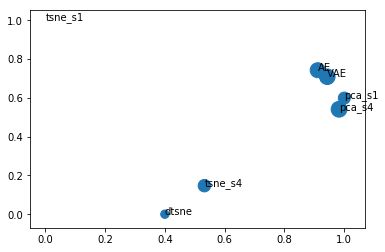

In [15]:
dist_p = df.columns[0:4]
neigh_p = df.columns[4:8]
stab_cols = df.columns[8:]

averages = np.array([df.index, df[stab_cols].mean(axis=1), df[dist_p].mean(axis=1), df[neigh_p].mean(axis=1)]).T

fig, ax = plt.subplots() 
ax.scatter(averages[:,2], averages[:,3], s=list(averages[:,1]*250))

for a in averages:
    ax.annotate(a[0], (a[2], a[3]))

https://docs.google.com/spreadsheets/d/1hfuTqH5VQadqbUBEIHHN05QlN8pKX5u8sZMd__NBAlA/edit?usp=sharing

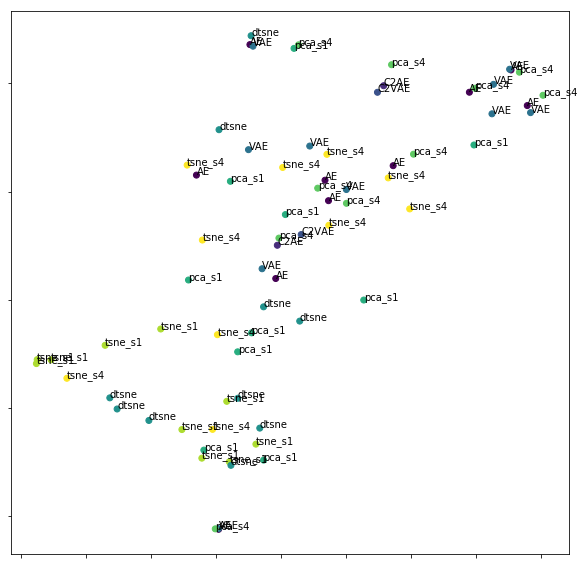

In [74]:
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets

X = df_metrics[metrics]

tsne = manifold.TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(X)

l = df_metrics['method']
d = dict([(y,x+1) for x,y in enumerate(sorted(set(l)))])
colors = [d[x] for x in l]

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Y[:, 0], Y[:, 1], c=colors)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for c,t in zip(Y, l):
    ax.annotate(t, (c[0], c[1]), fontsize=10)

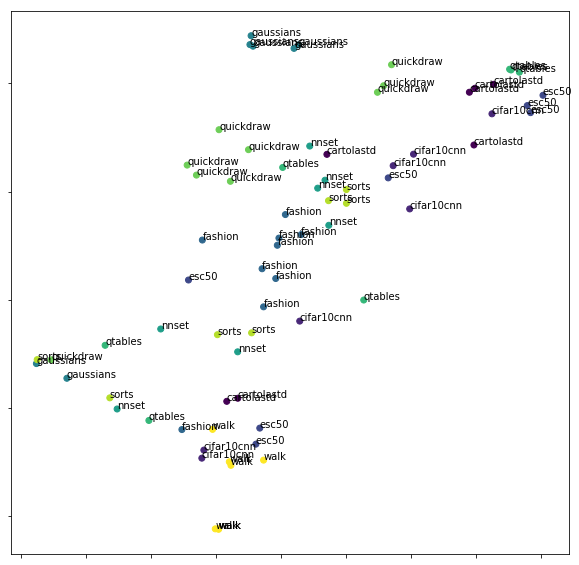

In [75]:
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets

X = df_metrics[metrics]

tsne = manifold.TSNE(n_components=2, random_state=0)
Y = tsne.fit_transform(X)

l = df_metrics['dataset']
d = dict([(y,x+1) for x,y in enumerate(sorted(set(l)))])
colors = [d[x] for x in l]

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Y[:, 0], Y[:, 1], c=colors)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for c,t in zip(Y, l):
    ax.annotate(t, (c[0], c[1]), fontsize=10)